In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('dataset-of-70s.csv')

In [3]:
data.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Porque?,Reginaldo Rossi,spotify:track:28KC2wl7jDv6Ms1Uc0OMpm,0.669,0.547,1,-9.873,0,0.0576,0.3530,0.000,0.0515,0.730,131.073,141067,4,28.79763,6,0
1,Free Jazz,Maria Teresa Luciani,spotify:track:0zagn8PNnM7pM8pz1gXOAD,0.291,0.300,1,-14.054,0,0.0326,0.9050,0.492,0.1180,0.039,75.619,228224,4,44.10303,9,0
2,Reject of Society,Crass,spotify:track:18eNASEiuAhO2ML5LBIoG4,0.355,0.968,7,-4.687,1,0.1890,0.0504,0.000,0.1300,0.768,181.291,66800,3,25.23004,6,0
3,Yeah !,The Jets,spotify:track:1UlJzHc8E5EprQFJxjSyPL,0.598,0.891,6,-11.904,1,0.0552,0.0183,0.836,0.5790,0.826,144.383,155395,4,55.62066,7,0
4,Gotta Find A Way,The Moments,spotify:track:1Jtlirju8tUXTtvyZJAN5v,0.440,0.376,5,-10.939,1,0.0482,0.3480,0.000,0.0815,0.358,130.438,218333,4,34.90979,12,1


# checking basic integrity

In [4]:
data.shape

(7766, 19)

In [5]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7766 entries, 0 to 7765
Data columns (total 19 columns):
track               7766 non-null object
artist              7766 non-null object
uri                 7766 non-null object
danceability        7766 non-null float64
energy              7766 non-null float64
key                 7766 non-null int64
loudness            7766 non-null float64
mode                7766 non-null int64
speechiness         7766 non-null float64
acousticness        7766 non-null float64
instrumentalness    7766 non-null float64
liveness            7766 non-null float64
valence             7766 non-null float64
tempo               7766 non-null float64
duration_ms         7766 non-null int64
time_signature      7766 non-null int64
chorus_hit          7766 non-null float64
sections            7766 non-null int64
target              7766 non-null int64
dtypes: float64(10), int64(6), object(3)
memory usage: 1.1+ MB


# no. of rows = non null values for each column -> no null value

In [6]:
data.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Porque?,Reginaldo Rossi,spotify:track:28KC2wl7jDv6Ms1Uc0OMpm,0.669,0.547,1,-9.873,0,0.0576,0.3530,0.000,0.0515,0.730,131.073,141067,4,28.79763,6,0
1,Free Jazz,Maria Teresa Luciani,spotify:track:0zagn8PNnM7pM8pz1gXOAD,0.291,0.300,1,-14.054,0,0.0326,0.9050,0.492,0.1180,0.039,75.619,228224,4,44.10303,9,0
2,Reject of Society,Crass,spotify:track:18eNASEiuAhO2ML5LBIoG4,0.355,0.968,7,-4.687,1,0.1890,0.0504,0.000,0.1300,0.768,181.291,66800,3,25.23004,6,0
3,Yeah !,The Jets,spotify:track:1UlJzHc8E5EprQFJxjSyPL,0.598,0.891,6,-11.904,1,0.0552,0.0183,0.836,0.5790,0.826,144.383,155395,4,55.62066,7,0
4,Gotta Find A Way,The Moments,spotify:track:1Jtlirju8tUXTtvyZJAN5v,0.440,0.376,5,-10.939,1,0.0482,0.3480,0.000,0.0815,0.358,130.438,218333,4,34.90979,12,1


# checking unique records using uri

In [7]:
# extracting exact id
def extract(x):
    splited_list = x.split(':') # spliting text at colons
    return splited_list[2]      # returning third element
    
data['uri'] = data['uri'].apply(extract)  

In [8]:
data.head() #successfully extracted the id

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Porque?,Reginaldo Rossi,28KC2wl7jDv6Ms1Uc0OMpm,0.669,0.547,1,-9.873,0,0.0576,0.3530,0.000,0.0515,0.730,131.073,141067,4,28.79763,6,0
1,Free Jazz,Maria Teresa Luciani,0zagn8PNnM7pM8pz1gXOAD,0.291,0.300,1,-14.054,0,0.0326,0.9050,0.492,0.1180,0.039,75.619,228224,4,44.10303,9,0
2,Reject of Society,Crass,18eNASEiuAhO2ML5LBIoG4,0.355,0.968,7,-4.687,1,0.1890,0.0504,0.000,0.1300,0.768,181.291,66800,3,25.23004,6,0
3,Yeah !,The Jets,1UlJzHc8E5EprQFJxjSyPL,0.598,0.891,6,-11.904,1,0.0552,0.0183,0.836,0.5790,0.826,144.383,155395,4,55.62066,7,0
4,Gotta Find A Way,The Moments,1Jtlirju8tUXTtvyZJAN5v,0.440,0.376,5,-10.939,1,0.0482,0.3480,0.000,0.0815,0.358,130.438,218333,4,34.90979,12,1


# checking for duplicate rows

In [9]:
data['uri'].nunique(), 

(7749,)

In [10]:
data['uri'].value_counts()


3mRM4NM8iO7UBqrSigCQFH    3
7fu3Tv5rcoGD1PZV7s57WW    2
2ljjoZun9Xid1AAFKEEXam    2
1hjNIcn5cvl9x8U44xUMqE    2
3iJGrfXRepS04IiZP3VBUp    2
                         ..
3rQHFR5ZeWojOak44FA3FZ    1
5vIJJklN9p1FfY8DdbF0XA    1
1m2SlWcpabs2ur7f1Ts7t1    1
6lSVidZXCnOnYAWcgIqVDF    1
6ZEr9rOBIb2kq0dursC9aB    1
Name: uri, Length: 7749, dtype: int64

In [11]:
data['uri'].value_counts().unique() 

array([3, 2, 1], dtype=int64)

In [12]:
dupe_mask = data['uri'].value_counts()==2

In [13]:
dupe_ids = dupe_mask[dupe_mask]

dupe_ids.value_counts,  dupe_ids.shape  

(<bound method IndexOpsMixin.value_counts of 7fu3Tv5rcoGD1PZV7s57WW    True
 2ljjoZun9Xid1AAFKEEXam    True
 1hjNIcn5cvl9x8U44xUMqE    True
 3iJGrfXRepS04IiZP3VBUp    True
 0RgcOUQg4qYAEt9RIdf3oB    True
 2IoP69pwUhyOtCACHEbhko    True
 1K1nzhbKCNmrNXi9B07mPF    True
 4xxn8GDqs7RUwgZTNznXNp    True
 5tmrnhMxx39jnu3kjopMdP    True
 7cRioMuuOoe8rwcqvsM4pD    True
 1naVD19eofGpFf6wosmHIe    True
 1QR3Wcba5NBidmxEE8DW3w    True
 4M1zcX803dgkDkISHZDPYi    True
 2T3R19V9qMiiuRWPor8Axf    True
 3sWHFwTUKWTwETu4QmD8bb    True
 Name: uri, dtype: bool>, (15,))

In [14]:
#converting duplicate ids into a list
dupe_ids  = dupe_ids.index
dupe_ids = dupe_ids.tolist()
dupe_ids

['7fu3Tv5rcoGD1PZV7s57WW',
 '2ljjoZun9Xid1AAFKEEXam',
 '1hjNIcn5cvl9x8U44xUMqE',
 '3iJGrfXRepS04IiZP3VBUp',
 '0RgcOUQg4qYAEt9RIdf3oB',
 '2IoP69pwUhyOtCACHEbhko',
 '1K1nzhbKCNmrNXi9B07mPF',
 '4xxn8GDqs7RUwgZTNznXNp',
 '5tmrnhMxx39jnu3kjopMdP',
 '7cRioMuuOoe8rwcqvsM4pD',
 '1naVD19eofGpFf6wosmHIe',
 '1QR3Wcba5NBidmxEE8DW3w',
 '4M1zcX803dgkDkISHZDPYi',
 '2T3R19V9qMiiuRWPor8Axf',
 '3sWHFwTUKWTwETu4QmD8bb']

In [15]:
duplicate_index = data.loc[data['uri'].isin(dupe_ids),:].index  # all the duplicted records
duplicate_index = duplicate_index.tolist()

# We will be removing all the duplication as they are few compared to data

In [16]:
data.drop(duplicate_index,axis=0,inplace=True)
data.shape

(7736, 19)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7736 entries, 0 to 7765
Data columns (total 19 columns):
track               7736 non-null object
artist              7736 non-null object
uri                 7736 non-null object
danceability        7736 non-null float64
energy              7736 non-null float64
key                 7736 non-null int64
loudness            7736 non-null float64
mode                7736 non-null int64
speechiness         7736 non-null float64
acousticness        7736 non-null float64
instrumentalness    7736 non-null float64
liveness            7736 non-null float64
valence             7736 non-null float64
tempo               7736 non-null float64
duration_ms         7736 non-null int64
time_signature      7736 non-null int64
chorus_hit          7736 non-null float64
sections            7736 non-null int64
target              7736 non-null int64
dtypes: float64(10), int64(6), object(3)
memory usage: 1.2+ MB


In [18]:
print("shape of data",data.shape )
print("no. of unique rows",data['uri'].nunique()) # no duplicates

shape of data (7736, 19)
no. of unique rows 7734


In [19]:
data.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Porque?,Reginaldo Rossi,28KC2wl7jDv6Ms1Uc0OMpm,0.669,0.547,1,-9.873,0,0.0576,0.3530,0.000,0.0515,0.730,131.073,141067,4,28.79763,6,0
1,Free Jazz,Maria Teresa Luciani,0zagn8PNnM7pM8pz1gXOAD,0.291,0.300,1,-14.054,0,0.0326,0.9050,0.492,0.1180,0.039,75.619,228224,4,44.10303,9,0
2,Reject of Society,Crass,18eNASEiuAhO2ML5LBIoG4,0.355,0.968,7,-4.687,1,0.1890,0.0504,0.000,0.1300,0.768,181.291,66800,3,25.23004,6,0
3,Yeah !,The Jets,1UlJzHc8E5EprQFJxjSyPL,0.598,0.891,6,-11.904,1,0.0552,0.0183,0.836,0.5790,0.826,144.383,155395,4,55.62066,7,0
4,Gotta Find A Way,The Moments,1Jtlirju8tUXTtvyZJAN5v,0.440,0.376,5,-10.939,1,0.0482,0.3480,0.000,0.0815,0.358,130.438,218333,4,34.90979,12,1


# now we will be dropping all the unnecessary columns which contain string which cant be eficiently converted into numerics

In [20]:
data.drop(['track','artist','uri'],axis=1,inplace=True)

In [21]:
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,0.669,0.547,1,-9.873,0,0.0576,0.3530,0.000,0.0515,0.730,131.073,141067,4,28.79763,6,0
1,0.291,0.300,1,-14.054,0,0.0326,0.9050,0.492,0.1180,0.039,75.619,228224,4,44.10303,9,0
2,0.355,0.968,7,-4.687,1,0.1890,0.0504,0.000,0.1300,0.768,181.291,66800,3,25.23004,6,0
3,0.598,0.891,6,-11.904,1,0.0552,0.0183,0.836,0.5790,0.826,144.383,155395,4,55.62066,7,0
4,0.440,0.376,5,-10.939,1,0.0482,0.3480,0.000,0.0815,0.358,130.438,218333,4,34.90979,12,1


# Univariate analysis

<AxesSubplot:xlabel='target', ylabel='count'>

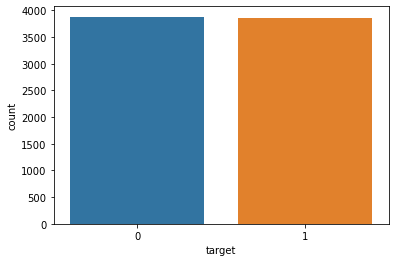

In [22]:
#analysing class imbalance
sns.countplot(data=data,x='target') 

In [23]:
data.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'chorus_hit', 'sections', 'target'],
      dtype='object')

In [24]:
# checking appropriate data type
data[['danceability', 'energy', 'key', 'loudness']].info() # every feature have appropriate datatype

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7736 entries, 0 to 7765
Data columns (total 4 columns):
danceability    7736 non-null float64
energy          7736 non-null float64
key             7736 non-null int64
loudness        7736 non-null float64
dtypes: float64(3), int64(1)
memory usage: 622.2 KB


In [25]:
# checking range of first 4 features 
data[['danceability', 'energy', 'key', 'loudness']].describe()


,danceability,energy,key,loudness
count,7736.000000,7736.000000,7736.000000,7736.000000
mean,0.525473,0.528040,5.204240,-11.733830
std,0.162930,0.235751,3.503019,4.822245
min,0.063000,0.001100,0.000000,-41.440000
25%,0.415000,0.354000,2.000000,-14.072000
50%,0.535000,0.533500,5.000000,-11.038500
75%,0.646000,0.712250,9.000000,-8.394750
max,0.961000,0.999000,11.000000,3.744000


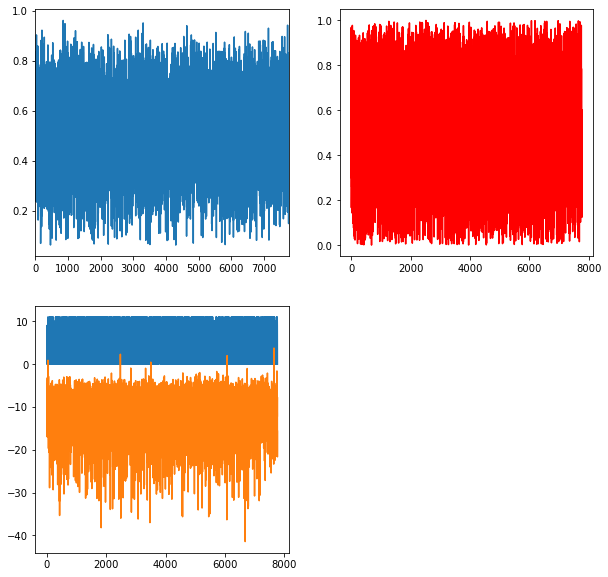

In [26]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
data['danceability'].plot()
plt.subplot(2,2,2)
plt.plot(data['energy'],color='red')
plt.subplot(2,2,3)
plt.plot(data[['key','loudness']])


#  danceabilty is well inside the range(0,1)
# energy is well inside the range(0,1)
# there's no -1 for keys-> every track has been assigned respective keys
# loudness values are out of range(0,-60)db

In [27]:
loudness_error_idnex = data[data['loudness']>0].index
loudness_error_idnex

Int64Index([38, 2476, 3501, 6069, 7649], dtype='int64')

In [28]:
 # removing rows with out of range values in loudness column
data.drop(loudness_error_idnex,axis=0, inplace=True)

In [29]:
data.shape  # record is removed 

(7731, 16)

In [30]:
# checking appropriate datatype for next 5 columns
data[['mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness',]].info() # datatypes are in acoordance with provided info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7731 entries, 0 to 7765
Data columns (total 5 columns):
mode                7731 non-null int64
speechiness         7731 non-null float64
acousticness        7731 non-null float64
instrumentalness    7731 non-null float64
liveness            7731 non-null float64
dtypes: float64(4), int64(1)
memory usage: 362.4 KB


In [31]:
data[['mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness',]].describe() # every feautre is within range

,mode,speechiness,acousticness,instrumentalness,liveness
count,7731.000000,7731.000000,7731.000000,7731.000000,7731.000000
mean,0.722416,0.062007,0.434598,0.162280,0.199975
std,0.447836,0.069760,0.321576,0.306194,0.180759
min,0.000000,0.022500,0.000001,0.000000,0.014600
25%,0.000000,0.033400,0.124000,0.000004,0.092400
50%,1.000000,0.041600,0.409000,0.000599,0.127000
75%,1.000000,0.060450,0.726000,0.100500,0.243000
max,1.000000,0.952000,0.996000,0.998000,0.999000


<AxesSubplot:xlabel='mode', ylabel='count'>

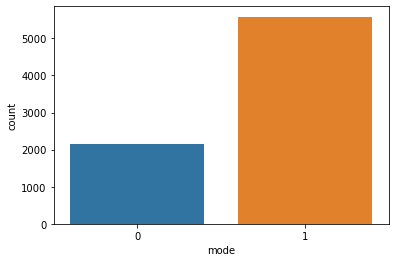

In [32]:
sns.countplot(x=data['mode']) # have only two possible values 0 and 1, no noise in the feature

In [33]:
data[['valence', 'tempo',
       'duration_ms', 'time_signature', 'chorus_hit', 'sections']].info() # data type is in accordance with provided info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7731 entries, 0 to 7765
Data columns (total 6 columns):
valence           7731 non-null float64
tempo             7731 non-null float64
duration_ms       7731 non-null int64
time_signature    7731 non-null int64
chorus_hit        7731 non-null float64
sections          7731 non-null int64
dtypes: float64(3), int64(3)
memory usage: 742.8 KB


In [34]:
data[['valence', 'tempo',
       'duration_ms', 'time_signature', 'chorus_hit', 'sections']].describe() # all the data are in specified range

,valence,tempo,duration_ms,time_signature,chorus_hit,sections
count,7731.000000,7731.000000,7.731000e+03,7731.000000,7731.000000,7731.000000
mean,0.596135,119.022192,2.398772e+05,3.883198,39.853858,10.759540
std,0.266252,28.400058,1.451962e+05,0.432438,18.298502,5.651019
min,0.000000,35.732000,2.049300e+04,1.000000,0.000000,0.000000
25%,0.397000,98.351000,1.730670e+05,4.000000,27.762280,8.000000
50%,0.639000,117.403000,2.107070e+05,4.000000,35.871290,10.000000
75%,0.824000,135.083000,2.648930e+05,4.000000,47.298390,12.000000
max,0.990000,241.423000,3.391040e+06,5.000000,220.024500,130.000000


# Performing F-test to know the relation between every feature and target

In [35]:
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,0.669,0.547,1,-9.873,0,0.0576,0.3530,0.000,0.0515,0.730,131.073,141067,4,28.79763,6,0
1,0.291,0.300,1,-14.054,0,0.0326,0.9050,0.492,0.1180,0.039,75.619,228224,4,44.10303,9,0
2,0.355,0.968,7,-4.687,1,0.1890,0.0504,0.000,0.1300,0.768,181.291,66800,3,25.23004,6,0
3,0.598,0.891,6,-11.904,1,0.0552,0.0183,0.836,0.5790,0.826,144.383,155395,4,55.62066,7,0
4,0.440,0.376,5,-10.939,1,0.0482,0.3480,0.000,0.0815,0.358,130.438,218333,4,34.90979,12,1


In [36]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
x.shape,y.shape

((7731, 15), (7731,))

In [37]:
from sklearn.feature_selection import f_classif
f_stat,p_value = f_classif(x,y) 

In [38]:
feat_list = data.iloc[:,:-1].columns.tolist()

In [39]:
# making a dataframe
dict = {'Features':feat_list,'f_statistics':f_stat,'p_value':p_value}
relation = pd.DataFrame(dict)
relation.sort_values(by='p_value')

,Features,f_statistics,p_value
7,instrumentalness,1244.151369,7.640887e-253
6,acousticness,717.317792,3.459588e-151
0,danceability,635.987730,6.339134e-135
3,loudness,598.669690,2.081137e-127
9,valence,553.879260,2.427928e-118
1,energy,488.853019,4.350842e-105
12,time_signature,131.313884,3.700441e-30
5,speechiness,128.958054,1.188920e-29
4,mode,70.464061,5.523407e-17
14,sections,20.284153,6.773104e-06


# Multivariate analysis

In [40]:
correlation = data.corr()

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

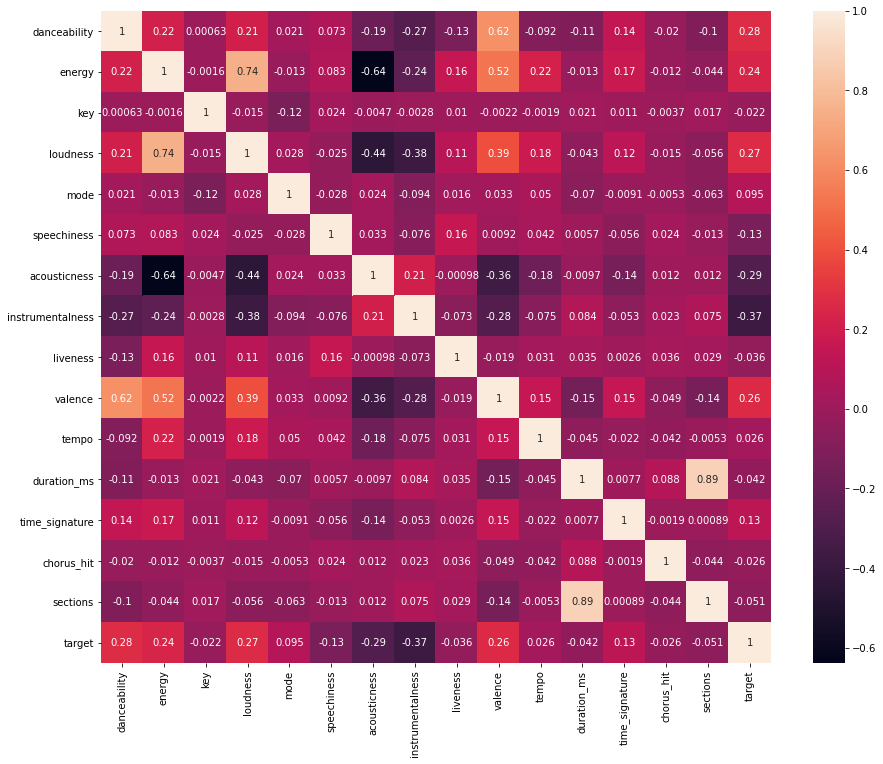

In [41]:
plt.figure(figsize=(15,12))
sns.heatmap(correlation, annot=True)
plt.tight_layout

# strong features(accordance with f-test) --> 
danceability,  loudness,  acousticness,  instrumentalness,  valence

# less imortant feature(accordance with f-test)-->
duration,  section,  mode,  time_signature,  chorus hit

# least imortant-->  
energy,key,speecheness,liveliness,tempo